In [1]:
!pip install seaborn==0.11.1
!pip install wordcloud==1.8.1

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 6.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 5.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_universal2.whl size=216660 sha256=974919fdc88582dc104d5cf05f5120ff03066acdffb05c81ba6a05f7ce61d84a
  Stored in directory: /Users/jacksonwalters/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# also set a random state
rs = 123

In [4]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [5]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [6]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [7]:
course_df.shape[0]

307

In [8]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [9]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [10]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

In [11]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [26]:
indices = course_df['MachineLearning'] == 1

ml_courses = course_df[indices]

In [34]:
big_data_courses = course_df[course_df['BigData'] == 1]

In [36]:
ml_big_data_courses = course_df[(course_df['BigData'] == 1) & (course_df['MachineLearning'] == 1)]

In [38]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [41]:
genre_sums = course_df[genres].sum(axis=0)

In [43]:
genre_sums_df = pd.DataFrame(genre_sums, columns = ['Count'])

In [48]:
genre_sums_df = genre_sums_df.sort_values(by = "Count", ascending=False)

<Axes: ylabel='Count'>

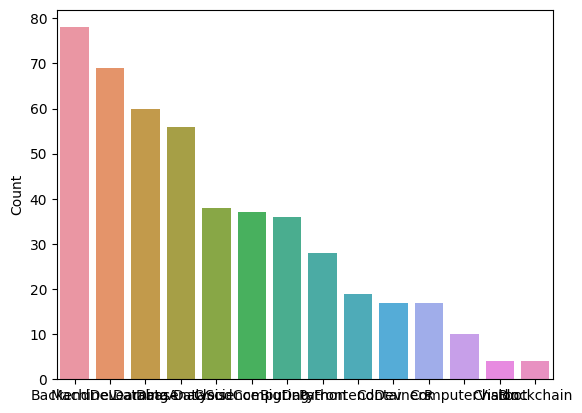

In [49]:
sns.barplot(x=genre_sums_df.index, y="Count", data=genre_sums_df)

In [50]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [51]:
ratings_df['rating'].unique()

array([3., 2.])

In [52]:
ratings_df.shape[0]

233306

In [65]:
ratings_df.groupby('user').size()

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Length: 33901, dtype: int64

In [58]:
course_df.describe()o

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,0.195440,0.091205,0.120521,0.182410,0.055375,0.224756,0.032573,0.123779,0.117264,0.013029,0.055375,0.254072,0.061889,0.013029
std,0.397186,0.288371,0.326102,0.386813,0.229083,0.418103,0.177807,0.329866,0.322260,0.113585,0.229083,0.436049,0.241348,0.113585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

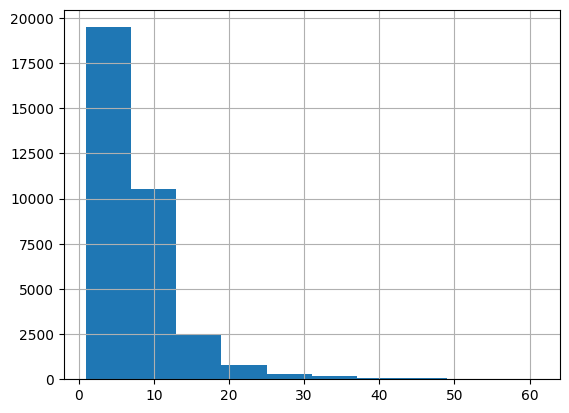

In [67]:
ratings_df.groupby('user').size().hist()

In [69]:
agg_ratings_count = ratings_df.groupby(['item']).size().reset_index()

In [70]:
agg_ratings_count.columns=['course', 'Ratings']

In [71]:
agg_ratings_count

,course,Ratings
0,AI0111EN,383
1,BC0101EN,6719
2,BC0201EN,2866
3,BC0202EN,775
4,BD0101EN,13291
...,...,...
121,TMP0105EN,347
122,TMP0106,35
123,TMP107,2
124,WA0101EN,2247


In [73]:
agg_ratings_count_sorted = agg_ratings_count.sort_values(by='Ratings', ascending=False).reset_index(drop=True)

In [74]:
agg_ratings_count_sorted

,course,Ratings
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
...,...,...
121,ST0201EN,1
122,ST0301EN,1
123,DX0106EN,1
124,DX0108EN,1


In [76]:
rated_courses = pd.merge(agg_ratings_count_sorted,course_df[['COURSE_ID', 'TITLE']],how='left', left_on='course', right_on='COURSE_ID')

In [82]:
top_20_rated_courses = rated_courses[:20]

In [83]:
top_20_rated_courses[['TITLE','Ratings']]

,TITLE,Ratings
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


In [84]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

In [85]:
top = 0

In [91]:
top_enrollments = sum(top_20_rated_courses['Ratings'].values); top_enrollments

147688

In [92]:
print(f"Percentage of the top course enrollments {round((top_enrollments * 100)/total, 2)}%")

Percentage of the top course enrollments 63.3%
